#          San Francisco Covid-19 Tests
#          March 2020 - April 2021

The following is analysis and visualization of San Francisco Covid-19 tests from March 2020 until April 2021. The tests had
been collected from all the labs of the city. The focus will be on dates of tests, total tests, and its results.

Importing necessary libraries and modules

In [72]:
import pandas as pd
import numpy as np

In [73]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [74]:
covid_test = pd.read_csv("C:/Users/Suhrab Aria/Documents/Covid-19_Tests.csv")
covid_test.rename(columns={"specimen_collection_date": 'Test_Collection_Date', "tests": 'Tests', "pos": 'Positive', "neg": 'Negative'}, inplace=True)
covid_test.head()

,Test_Collection_Date,Tests,Positive,pct,Negative,indeterminate,Last Updated At,data_loaded_at
0,2020/03/01,2,0,0.000,2,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:04 AM
1,2020/03/03,8,2,0.250,6,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM
2,2020/03/08,12,3,0.250,9,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM
3,2020/03/10,91,7,0.077,84,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM
4,2020/03/17,338,30,0.089,308,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM


Changing test collection date type to datetime and making it as index

In [49]:
covid_test["Test_Collection_Date"] = covid_test["Test_Collection_Date"].astype('datetime64[ns]')
covid_test.set_index('Test_Collection_Date').head()

,Tests,Positive,pct,Negative,indeterminate,Last Updated At,data_loaded_at
Test_Collection_Date,,,,,,,
2020-03-01,2,0,0.000,2,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:04 AM
2020-03-03,8,2,0.250,6,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM
2020-03-08,12,3,0.250,9,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM
2020-03-10,91,7,0.077,84,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM
2020-03-17,338,30,0.089,308,0,10/16/2021 04:33:42 PM,10/17/2021 09:00:05 AM


Summarizing the dates of first column to Months and other columns

In [50]:
monthly_resampled_data = covid_test.resample('M', on='Test_Collection_Date').sum()
monthly_resampled_data.head()

,Tests,Positive,pct,Negative,indeterminate
Test_Collection_Date,,,,,
2020-03-31,6294,652,3.416,5628,14
2020-04-30,23894,1678,2.827,22161,55
2020-05-31,47900,1214,0.831,46615,71
2020-06-30,90125,1614,0.539,88434,77
2020-07-31,124777,4093,1.044,120605,79


Dropping two columns

In [51]:
monthly_tests = monthly_resampled_data.drop(['pct', 'indeterminate'], axis=1)
monthly_tests.head()

,Tests,Positive,Negative
Test_Collection_Date,,,
2020-03-31,6294,652,5628
2020-04-30,23894,1678,22161
2020-05-31,47900,1214,46615
2020-06-30,90125,1614,88434
2020-07-31,124777,4093,120605


The following line graph shows the trend of tests and its results. There is an increase in number of tests and its negative
result over the months, but the positive results had not fluctuated considerably. 

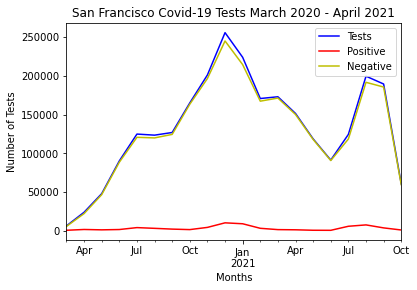

In [88]:
monthly_tests.plot(kind='line', color={'Tests': 'b', 'Positive': 'r', 'Negative': 'y'})

plt.title('San Francisco Covid-19 Tests March 2020 - April 2021')
plt.ylabel('Number of Tests')
plt.xlabel('Months')

plt.show()

The total of two columns

In [75]:
result_comparison = covid_test[['Positive', 'Negative']].sum()
result_comparison.head()

Positive      65159
Negative    2598569
dtype: int64

The following pie chart exhibits the percentage of tests results; only 2.4 percent of total tests were positive.

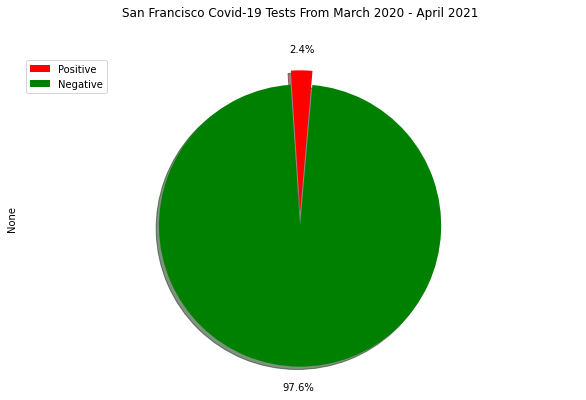

In [86]:
color_s = ['red', 'green']
explode_one = [0, 0.1,]
columns = ['Positive', 'Negative']

result_comparison.plot(kind='pie', figsize=(10, 6), 
                       autopct='%1.1f%%', 
                       startangle=85, 
                       shadow=True, 
                       labels=None, 
                       pctdistance=1.15,
                      colors=color_s,
                       explode=explode_one)

plt.title('San Francisco Covid-19 Tests From March 2020 - April 2021', y=1.1)
plt.axis('equal')
plt.legend(labels=columns, loc='upper left')
cols= ['b', 'r', 'y']

plt.show()